In [32]:
import os
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
% matplotlib inline

plt.rcParams['figure.figsize'] = 8, 8

data_path = os.environ['MS_DATA_PATH']

### Get Le Data

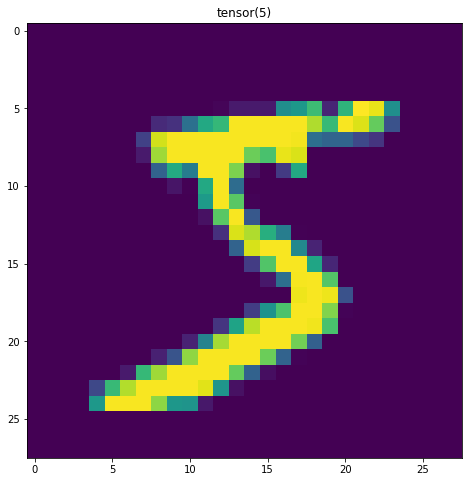

In [34]:
mnist = MNIST(root=data_path, download=True, transform=transforms.ToTensor(), train=True)
x, y = mnist[0]

plt.title(y)
plt.imshow(x.squeeze())
plt.show()

# TODO train, test, loaders, batches

### Define Le Model

In [35]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
    
model = ConvNet()